<a href="https://colab.research.google.com/github/BearKS/Robotic-weed-control-system/blob/feature%2Fextraction/weed_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!pip install opencv-python-headless
!pip install opencv-python
!pip install skimage

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached skimage-0.0.tar.gz (757 bytes)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [87]:
# Import the necessary libraries
import cv2
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

In [88]:
# Connect Google Drive to Google Colab
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [90]:
# Load path of segmentation mask image
image_path = "/content/gdrive/MyDrive/Project/sweet_basil/mask/0_output.png"

# # Load Pr mask from segmentation
# image_path = pr_mask

In [91]:

input_img,eroded_img,denoised_img = denoise_image(image_path)


In [111]:
def denoise_image(image_path):
    # Load image in grayscale
    img = cv2.imread(image_path, 0)
    # Check if image was loaded successfully
    if img is None:
        print('Error: Failed to load image at path:', image_path)
        return None

    else:
        # Define structuring elements
        kernel_rect = np.ones((20, 20), np.uint8)
        kernel_circ = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (8, 8))
        kernel_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (8, 8))
        
        # Apply morphology operations with different kernels
        eroded_rect = cv2.erode(img, kernel_rect, iterations=3)
        dilated_rect = cv2.dilate(eroded_rect, kernel_rect, iterations=3)
    
        eroded_circ = cv2.erode(img, kernel_circ, iterations=3)
        dilated_circ = cv2.dilate(eroded_circ, kernel_circ, iterations=3)
    
        eroded_cross = cv2.erode(img, kernel_cross, iterations=3)
        dilated_cross = cv2.dilate(eroded_cross, kernel_cross, iterations=3)

        # Combine the eroded images
        eroded = cv2.bitwise_or(eroded_rect, eroded_circ)
        eroded = cv2.bitwise_or(eroded, eroded_cross)

        # Combine the denoised images
        denoised = cv2.bitwise_or(dilated_rect, dilated_circ)
        denoised = cv2.bitwise_or(denoised, dilated_cross)

        return img,eroded,denoised

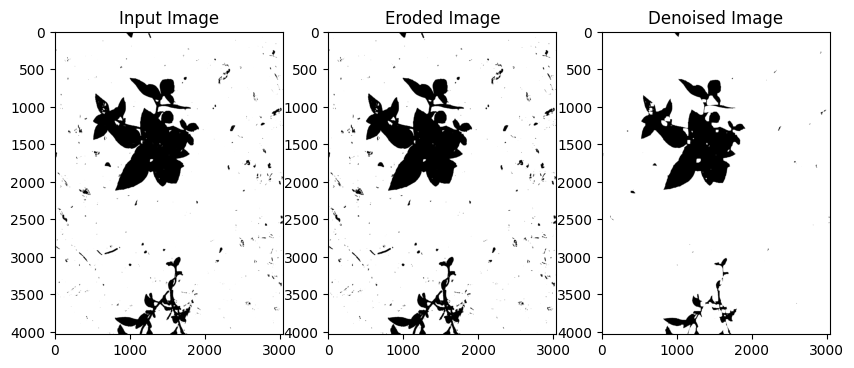

In [112]:
# Check if the denoised image was returned successfully
if denoised_img is not None:
    # Visualize the input and output images
    fig, ax = plt.subplots(1, 3, figsize=(10, 5))
    ax[0].imshow(input_img, cmap='gray')
    ax[0].set_title('Input Image')
    ax[1].imshow(eroded_img, cmap='gray')
    ax[1].set_title('Eroded Image')
    ax[2].imshow(denoised_img, cmap='gray')
    ax[2].set_title('Denoised Image')
    plt.show()

In [ ]:
# # # Load the segmentation mask (you can replace the URL with your own mask image)
# # mask_url = "/content/gdrive/MyDrive/Project/sweet_basil/mask/0_output.png"
# # mask = io.imread(mask_url)
# # Step 1: Import the necessary libraries
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# from skimage.restoration import denoise_nl_means, estimate_sigma
# from skimage import img_as_ubyte, img_as_float

# # Step 2: Load the segmentation mask
# def load_mask(file_path):
#     mask = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
#     return mask

# # Step 3: Apply noise reduction techniques
# def denoise_mask(mask, h_value=3000):
#     float_mask = img_as_float(mask)
#     sigma_est = np.mean(estimate_sigma(float_mask, multichannel=False))
#     denoised_mask = denoise_nl_means(float_mask, h=h_value*sigma_est, fast_mode=True, patch_size=5, patch_distance=3, multichannel=False)
#     return img_as_ubyte(denoised_mask)

# # Step 4: Save and display the resulting mask
# def save_and_display(input_mask, denoised_mask, file_name="denoised_mask.png"):
#     cv2.imwrite(file_name, denoised_mask)
#     fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
#     ax[0].imshow(input_mask, cmap='gray')
#     ax[0].set_title("Original Mask")
#     ax[1].imshow(denoised_mask, cmap='gray')
#     ax[1].set_title("Denoised Mask")
#     plt.show()

# # Main function
# def main():
#     mask_file_path = "/content/gdrive/MyDrive/Project/sweet_basil/mask/0_output.png"  # Replace with your file path
#     input_mask = load_mask(mask_file_path)
#     denoised_mask = denoise_mask(input_mask)
#     save_and_display(input_mask, denoised_mask)

# if __name__ == "__main__":
#     main()